In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Rutas
DATA_DIR = os.path.join('..', 'data', 'raw') 
CLASSES = ["Natalie Portman", "Scarlett Johansson"]

print(f"Versión de TensorFlow: {tf.__version__}")
print("¡Importaciones listas!")

Versión de TensorFlow: 2.20.0
¡Importaciones listas!


In [2]:
def clean_images(base_path, allowed_classes):
    # Extensiones válidas
    valid_exts = ('.jpeg', '.jpg', '.bmp', '.png')
    total_valid = 0
    
    print(f"Analizando ruta: {os.path.abspath(base_path)}")
    
    for category in allowed_classes:
        folder_path = os.path.join(base_path, category)
        if not os.path.exists(folder_path): continue
            
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            try:
                # Chequeo 1: Extensión
                if not image_name.lower().endswith(valid_exts):
                    os.remove(image_path); continue
                
                # Chequeo 2: Lectura con OpenCV (reemplaza a imghdr)
                img = cv2.imread(image_path)
                if img is None:
                    os.remove(image_path); continue
                
                total_valid += 1
            except:
                pass
    print(f"Total imágenes válidas listas: {total_valid}")

clean_images(DATA_DIR, CLASSES)

Analizando ruta: c:\Users\josue\UNI\celebrity-face-classifier\data\raw
Total imágenes válidas listas: 300


In [3]:
# --- CELDA 2: Limpieza de Datos ---
def clean_dataset(base_path, classes):
    valid_exts = ('.jpg', '.jpeg', '.png', '.bmp')
    removed_count = 0
    valid_count = 0
    
    print("Iniciando limpieza profunda...")
    
    for class_name in classes:
        folder = os.path.join(base_path, class_name)
        if not os.path.exists(folder):
            print(f"Advertencia: No existe la carpeta {class_name}")
            continue
            
        files = os.listdir(folder)
        for f in files:
            f_path = os.path.join(folder, f)
            try:
                # 1. Verificar extensión
                if not f.lower().endswith(valid_exts):
                    os.remove(f_path)
                    removed_count += 1
                    continue
                
                # 2. Verificar integridad con OpenCV
                img = cv2.imread(f_path)
                if img is None:
                    os.remove(f_path)
                    removed_count += 1
                    print(f"Corrupta eliminada: {f}")
                    continue
                
                valid_count += 1
            except Exception as e:
                print(f"Error procesando {f}: {e}")

    print("-" * 30)
    print(f"Limpieza terminada.")
    print(f"Imágenes válidas totales: {valid_count}")
    print(f"Imágenes eliminadas: {removed_count}")
    print("-" * 30)

clean_dataset(DATA_DIR, CLASSES)

Iniciando limpieza profunda...
------------------------------
Limpieza terminada.
Imágenes válidas totales: 300
Imágenes eliminadas: 0
------------------------------


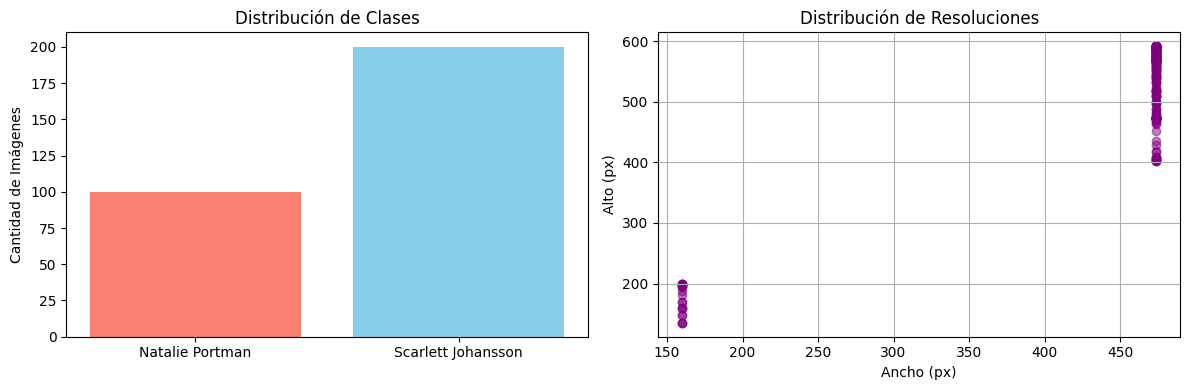

--- ESTADÍSTICAS DEL DATASET ---
Conteo por clase: {'Natalie Portman': 100, 'Scarlett Johansson': 200}
Resolución Promedio: 452x510
Media RGB Global (para normalizar): [0.55301504 0.46244516 0.42501153]


In [4]:
# --- CELDA 3: Análisis Exploratorio (EDA) ---
def analyze_data(base_path, classes):
    widths = []
    heights = []
    class_counts = {}
    
    # Acumuladores para calcular la media RGB (R, G, B)
    channel_sums = np.zeros(3)
    pixel_count = 0
    
    for class_name in classes:
        folder = os.path.join(base_path, class_name)
        files = os.listdir(folder)
        class_counts[class_name] = len(files)
        
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path)
            if img is None: continue
            
            # Convertir de BGR (OpenCV) a RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Guardar dimensiones
            h, w, _ = img.shape
            widths.append(w)
            heights.append(h)
            
            # Acumular valores para la media (normalizando 0-255 a 0-1 temporalmente)
            img_norm = img / 255.0
            channel_sums += np.sum(img_norm, axis=(0, 1))
            pixel_count += (h * w)
            
    # Calcular estadísticas finales
    mean_rgb = channel_sums / pixel_count
    
    # --- VISUALIZACIÓN ---
    plt.figure(figsize=(12, 4))
    
    # 1. Gráfico de Barras (Balance de Clases)
    plt.subplot(1, 2, 1)
    plt.bar(class_counts.keys(), class_counts.values(), color=['salmon', 'skyblue'])
    plt.title("Distribución de Clases")
    plt.ylabel("Cantidad de Imágenes")
    
    # 2. Scatter Plot (Resoluciones)
    plt.subplot(1, 2, 2)
    plt.scatter(widths, heights, alpha=0.5, c='purple')
    plt.title("Distribución de Resoluciones")
    plt.xlabel("Ancho (px)")
    plt.ylabel("Alto (px)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"--- ESTADÍSTICAS DEL DATASET ---")
    print(f"Conteo por clase: {class_counts}")
    print(f"Resolución Promedio: {np.mean(widths):.0f}x{np.mean(heights):.0f}")
    print(f"Media RGB Global (para normalizar): {mean_rgb}")

analyze_data(DATA_DIR, CLASSES)
